In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

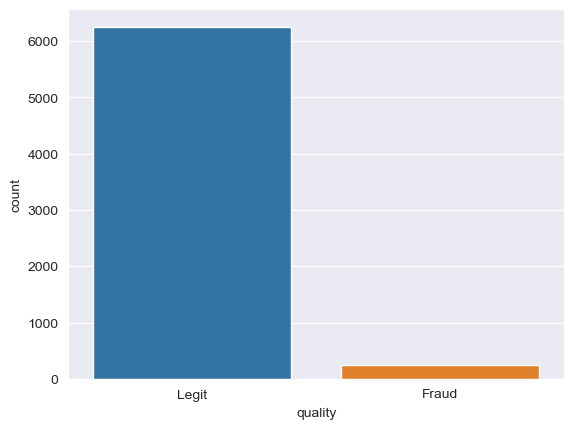

In [8]:
sns.countplot(data=df,x="quality",hue="quality")

<Axes: xlabel='quality', ylabel='count'>

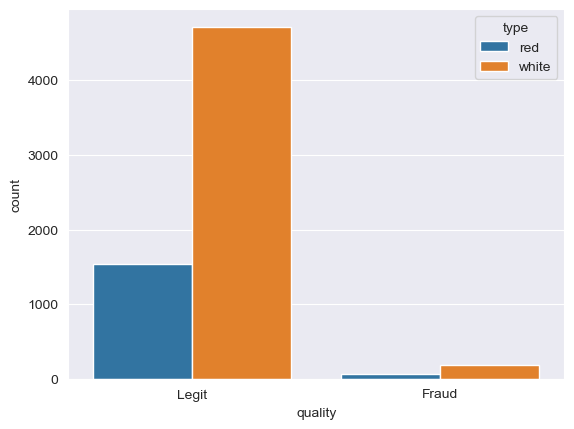

In [9]:
sns.countplot(data=df,x="quality",hue="type")

In [10]:
reds = df[df["type"] == "red"]

In [11]:
whites = df[df["type"] == "white"]

In [14]:
len(reds[reds["quality"] == "Fraud"]) * 100 / len(reds)

3.9399624765478425

In [15]:
len(whites[whites["quality"]=="Fraud"]) * 100 / len(whites)

3.736218864842793

In [16]:
df["Fraud"] = df["quality"].map({"Legit":0,"Fraud":1})

<Axes: >

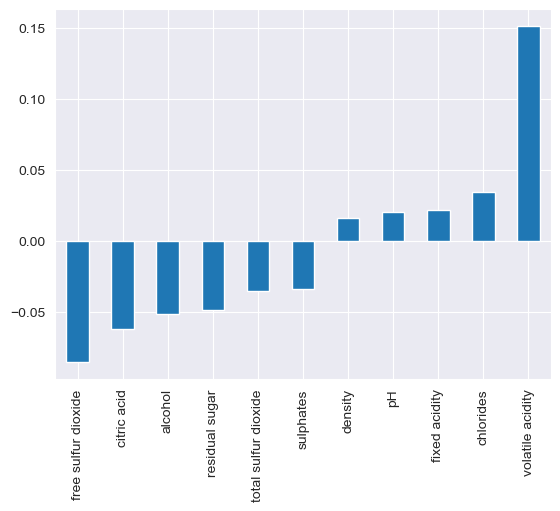

In [19]:
df.corr(numeric_only=True)["Fraud"][:-1].sort_values().plot(kind="bar")

<Axes: >

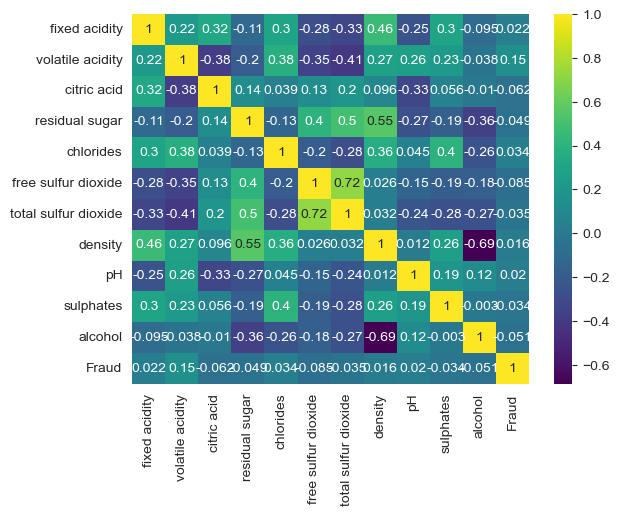

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")

In [22]:
df = df.drop(columns=["Fraud"])

In [23]:
df["type"] = pd.get_dummies(df["type"],drop_first=True)

In [24]:
X =df.drop(columns=["quality"])

In [25]:
y=df["quality"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(class_weight="balanced")

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {"C":[0.001,0.01,0.1,0.5,1],"gamma":[0.001,0.01,0.1,0.5,1],"kernel":["linear","rbf"]}

In [40]:
grid = GridSearchCV(svc, param_grid, cv=5,n_jobs=-1,verbose=2)

In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
y_pred = grid.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[  3,  24],
       [  0, 623]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       1.00      0.11      0.20        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.98      0.56      0.59       650
weighted avg       0.96      0.96      0.95       650

